In [5]:
from nilearn import datasets, plotting, image
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import load_img, resample_to_img
import pandas as pd

# from cmcrameri import cm
import matplotlib.pyplot as plt
import numpy as np


## functions

In [2]:
import pandas as pd

def find_indices_with_term(df, term, columns_to_check):
    """
    Find indices in a DataFrame where the given term appears in any of the specified columns.

    Parameters:
    - df: pandas.DataFrame, the DataFrame to search.
    - term: str, the term to search for.
    - columns_to_check: list, the columns in which to search for the term.

    Returns:
    - list, a list of indices where the term is found.
    """
    # Apply a mask to find the term in the specified columns, case insensitive
    mask = df[columns_to_check].apply(lambda x: x.str.contains(term, case=False, na=False)).any(axis=1)
    
    # Get the indices where the term is found
    indices_with_term = df.index[mask].tolist()
    
    return indices_with_term



# Note: Replace 'labels_df' with the actual DataFrame variable you are using.


## load atlas

In [3]:


# Load the custom atlas NIfTI file
atlas_filename = '/Users/h/Documents/MATLAB/Neuroimaging_Pattern_Masks/Atlases_and_parcellations/2023_CANLab_atlas/src/CANLab2023_MNI152NLin2009cAsym_scaffold.nii.gz'
atlas_img = load_img(atlas_filename)
# Load the standard MNI template at 2mm resolution provided by nilearn
target_img = datasets.load_mni152_template(resolution=2)

# Resample your atlas to the same space as the target MNI template
# resampled_atlas_img = resample_to_img(source_img=atlas_img, target_img=target_img, interpolation='nearest')

# Load the CSV file containing labels
labels_csv = '/Users/h/Documents/MATLAB/Neuroimaging_Pattern_Masks/Atlases_and_parcellations/2023_CANLab_atlas/src/CANLab2023_MNI152NLin2009cAsym_labels.csv'
labels_df = pd.read_csv(labels_csv)



In [6]:
atlas_img.shape

(193, 229, 193, 542)

In [6]:
first_volume_data = atlas_img.get_fdata()[:, :, :, 0]
first_volume_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

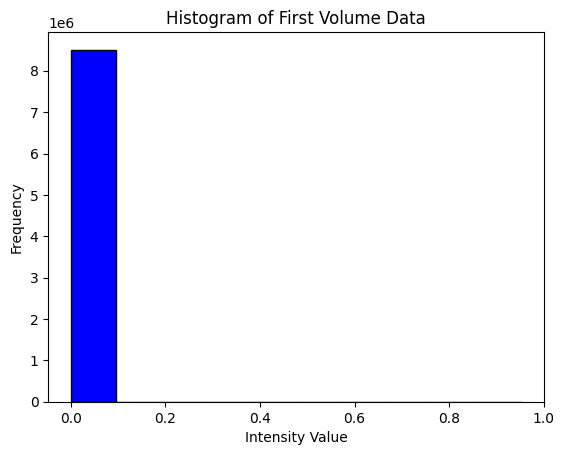

In [13]:
plt.hist(first_volume_data.flatten(), color='blue', edgecolor='black')
plt.title('Histogram of First Volume Data')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()

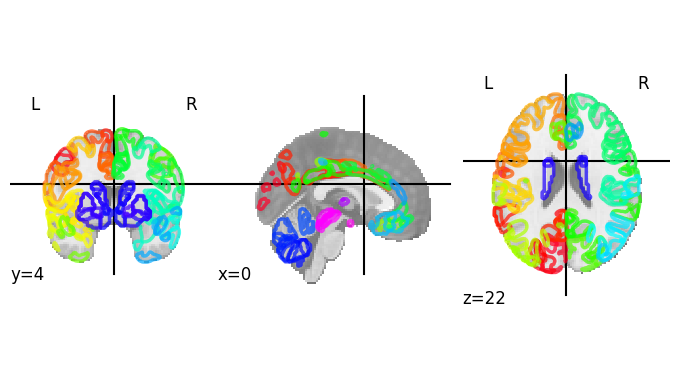

In [9]:
plotting.plot_prob_atlas(atlas_img)

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


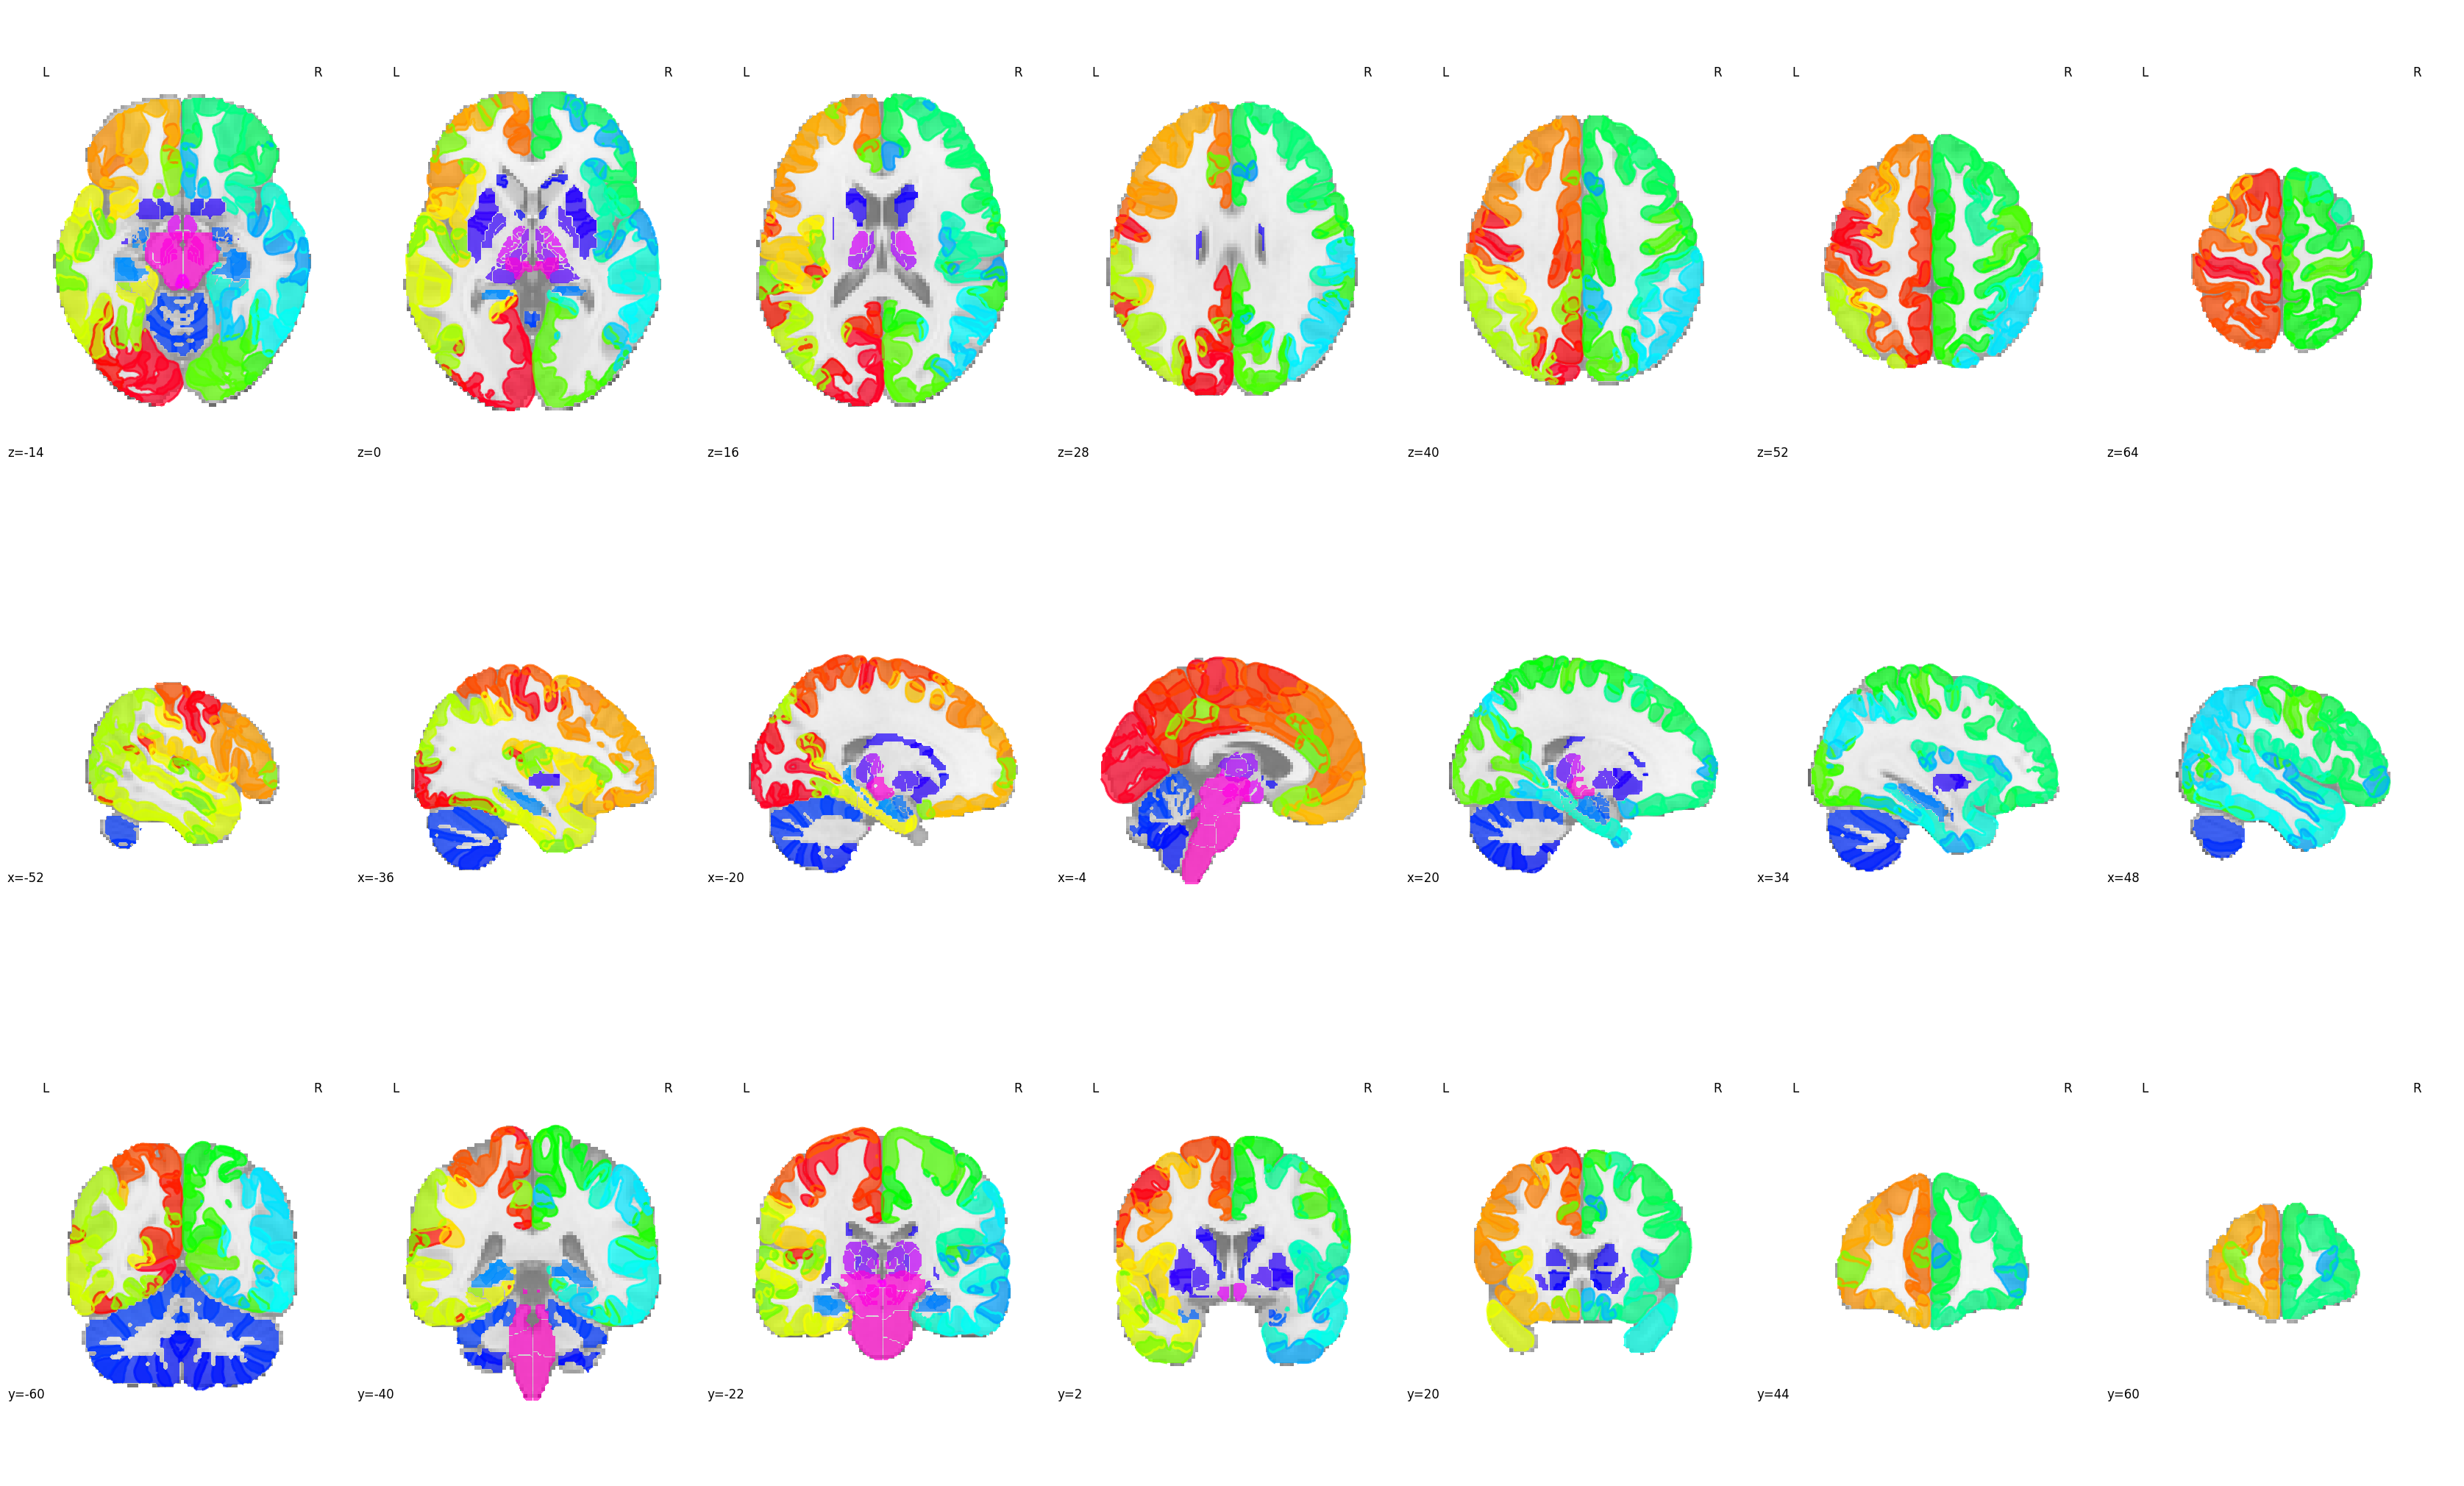

In [10]:
plotting.plot_prob_atlas(atlas_img, view_type="filled_contours", threshold=0.2, display_mode="mosaic", draw_cross=False)

In [3]:
labels_df

labels                    label_descriptions  \
0                Ctx_V1_L          Primary visual cortex (Left)   
1               Ctx_MST_L  Medial superior temporal area (Left)   
2                Ctx_V6_L              sixth visual area (Left)   
3                Ctx_V2_L             second visual area (Left)   
4                Ctx_V3_L              third visual area (Left)   
..                    ...                                   ...   
537  Bstem_BStem_Ponsrv_R            Pons right rostral ventral   
538  Bstem_BStem_Ponscv_R             Pons right caudal ventral   
539  Bstem_BStem_Ponscd_R              Pons right caudal dorsal   
540     Bstem_BStem_Med_L                          Medulla left   
541     Bstem_BStem_Med_R                         Medulla right   

          labels_2        labels_3         labels_4  \
0         Ctx_V1_L       striate_L   visual_early_L   
1        Ctx_MST_L          dMT+_L     visual_MT+_L   
2         Ctx_V6_L            V6_L  visual_dorsal_L   
3         Ctx_V2_L  extrastriate_L   visual_early_L   
4         Ctx_V3_L  extrastriate_L   visual_early_L   
..             ...             ...              ...   
537  Shen_Pons_Rrv   Shen_Pons_Rrv           Pons_R   
538  Shen_Pons_Rcv   Shen_Pons_Rcv           Pons_R   
539  Shen_Pons_Rcd   Shen_Pons_Rcd           Pons_R   
540     Shen_Med_L      Shen_Med_L        Medulla_L   
541     Shen_Med_R      Shen_Med_R        Medulla_R   

                         labels_5  
0    Glasser2016+Petre2023VolProj  
1    Glasser2016+Petre2023VolProj  
2    Glasser2016+Petre2023VolProj  
3    Glasser2016+Petre2023VolProj  
4    Glasser2016+Petre2023VolProj  
..                            ...  
537                       Shen268  
538                       Shen268  
539                       Shen268  
540                       Shen268  
541                       Shen268  

[542 rows x 6 columns]

## subset medulla


In [18]:

columns_to_check = ['labels_4']
indices_with_medulla = find_indices_with_term(labels_df, 'medulla', columns_to_check)

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


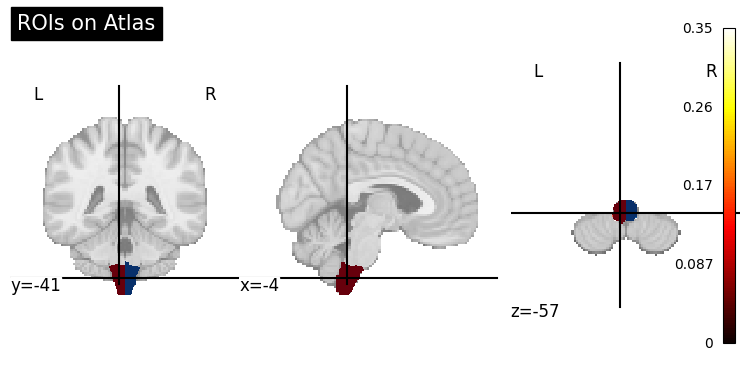

In [28]:
indices_with_medulla = find_indices_with_term(labels_df, 'medulla', columns_to_check)
display = plotting.plot_stat_map(image.index_img(atlas_img, indices_with_medulla[0]), title="ROIs on Atlas")

num_indices = len(indices_with_medulla)

# Generate a list of colormaps
# Here we use a simple approach to select from a set of colormaps
available_cmaps = ['Reds', 'Blues', 'Greens', 'Oranges', 'Purples', 'Greys', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd']
# Ensure we have enough colormaps, repeat the list if necessary
cmaps = available_cmaps * (num_indices // len(available_cmaps) + 1)

# Loop through the indices and plot each ROI with a unique colormap
for index, cmap in zip(indices_with_medulla, cmaps[:num_indices]):
    roi_img = image.index_img(atlas_img, index)
    display.add_overlay(roi_img, cmap=cmap)

# Show the plot
plotting.show()


In [ ]:
len(cm.batlow)

In [19]:
indices_with_insula = find_indices_with_term(labels_df, 'insula', columns_to_check)
insula_atlas = image.index_img(atlas_img, indices_with_insula)

In [21]:
insula_atlas.shape

(193, 229, 193, 26)

## insula

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


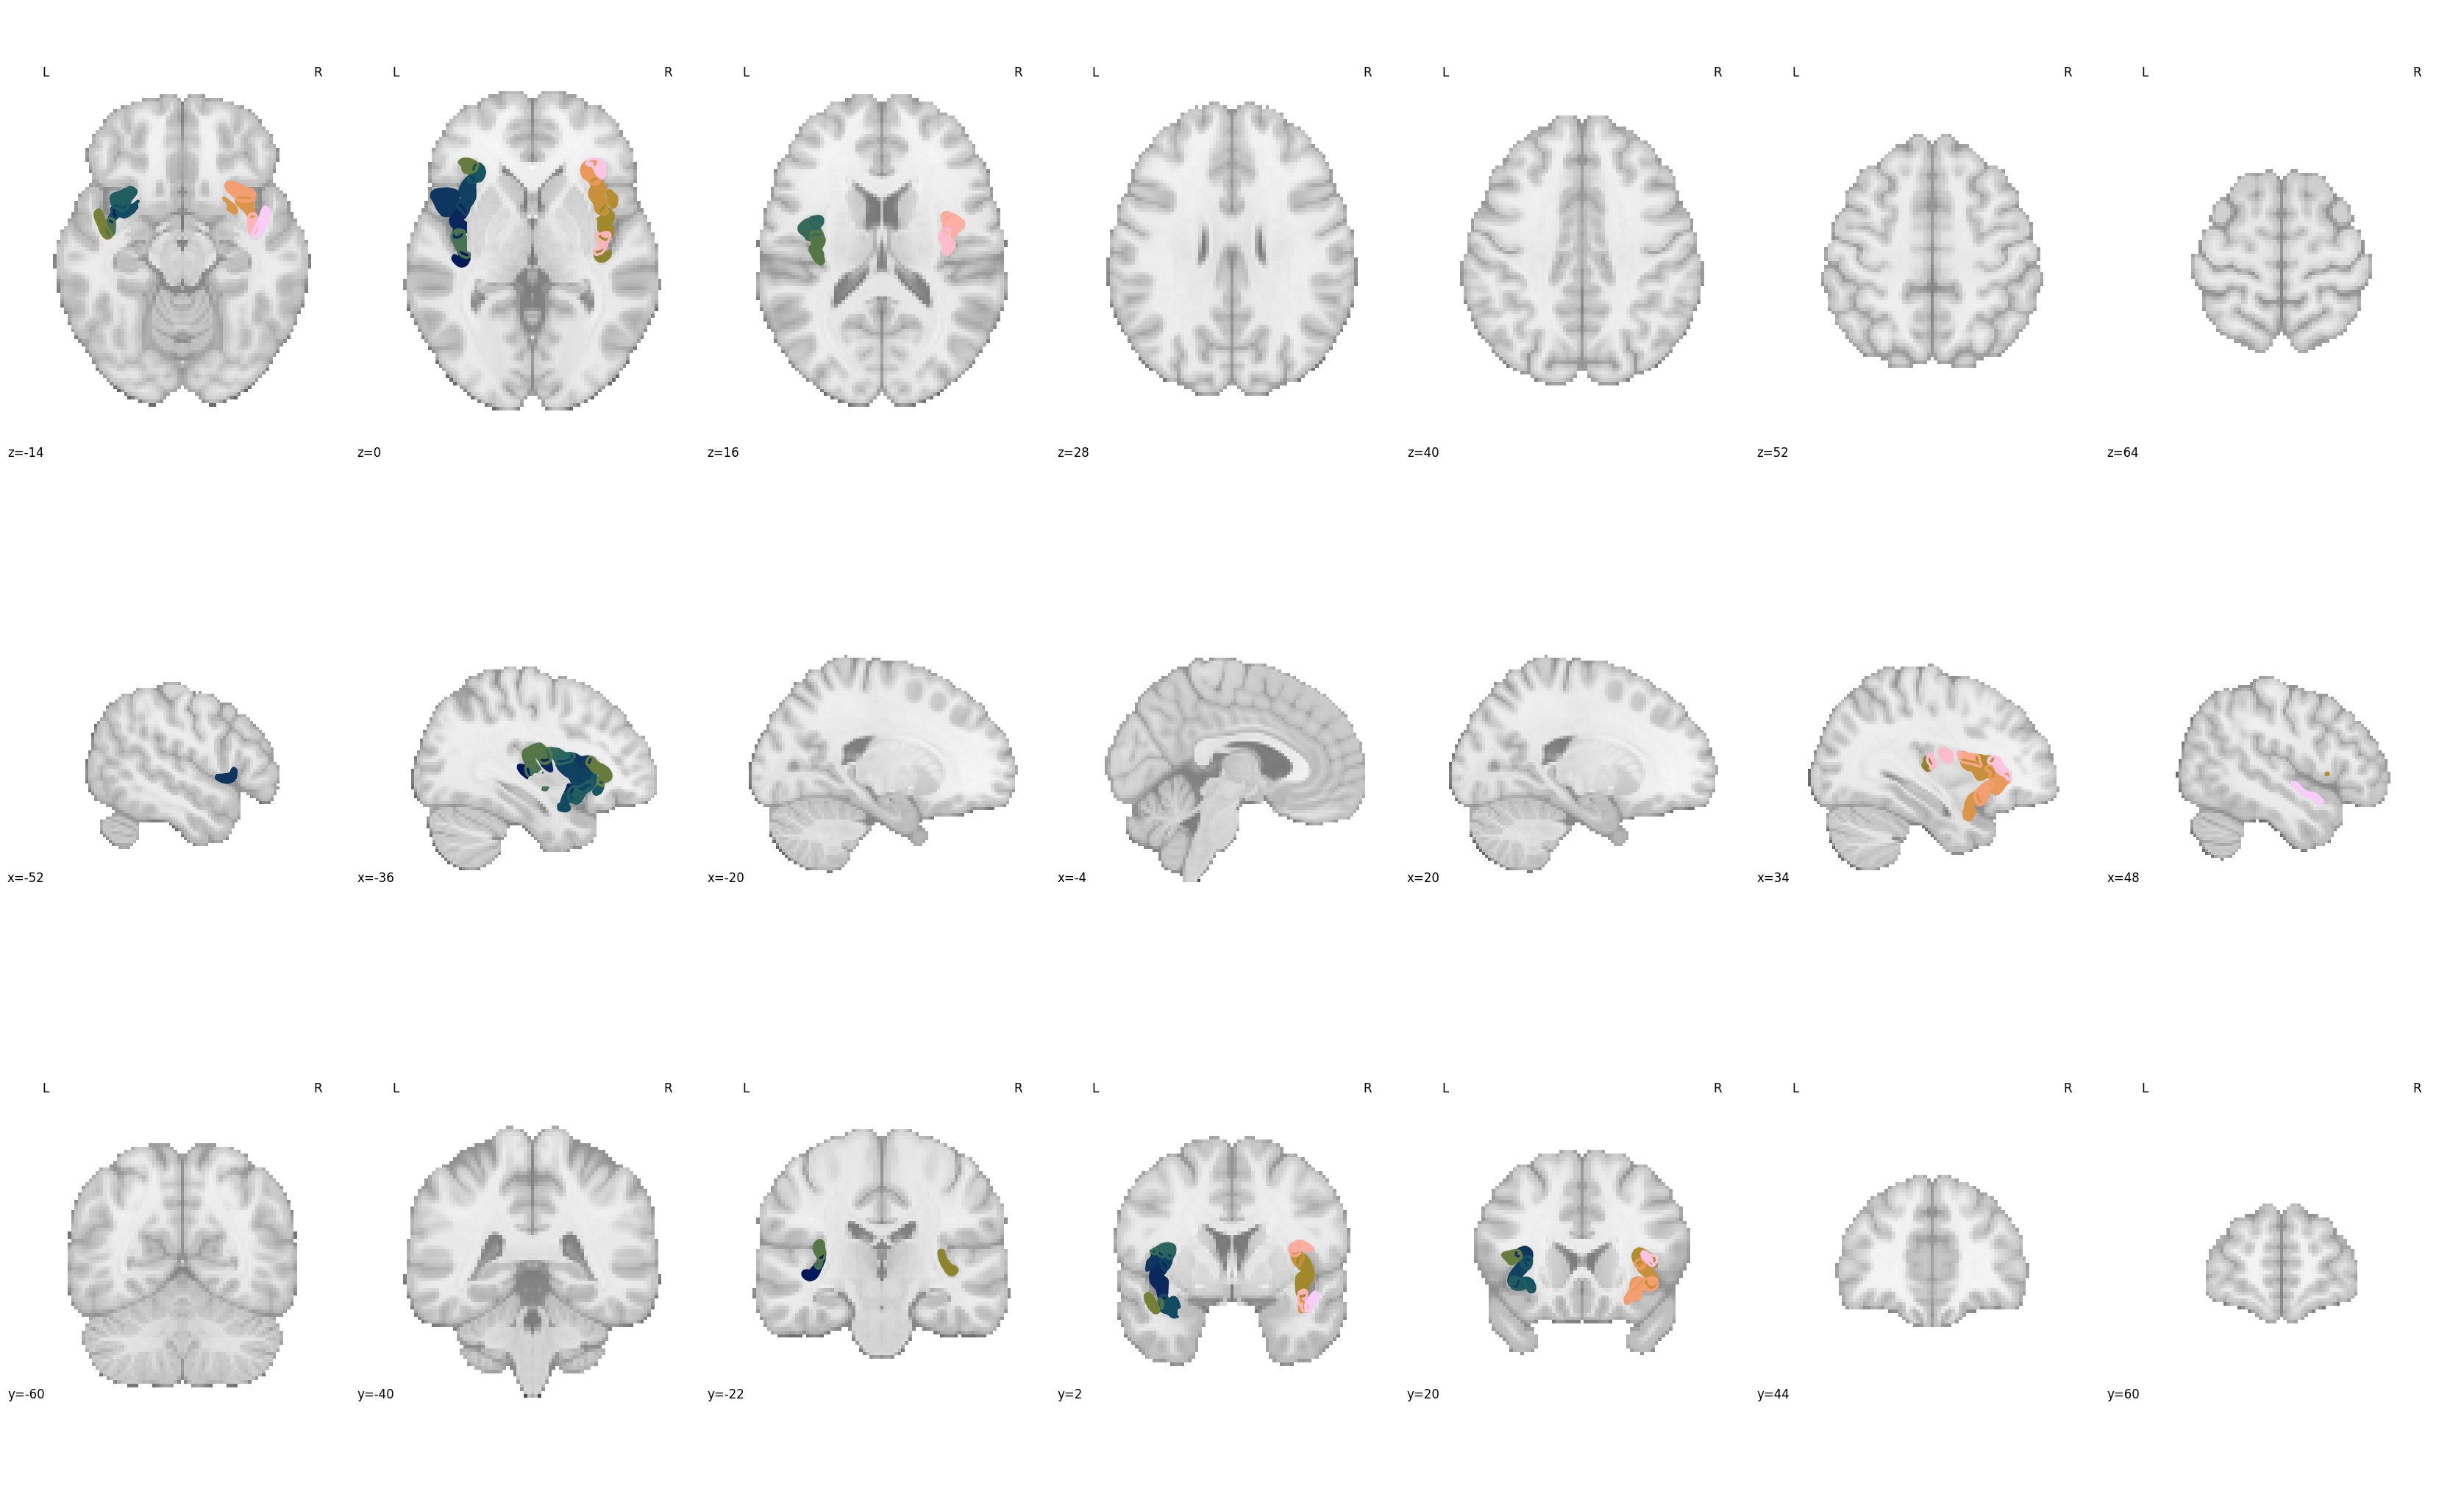

In [23]:
indices_with_insula = find_indices_with_term(labels_df, 'insula', columns_to_check)
insula_atlas = image.index_img(atlas_img, indices_with_insula)
plotting.plot_prob_atlas(insula_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


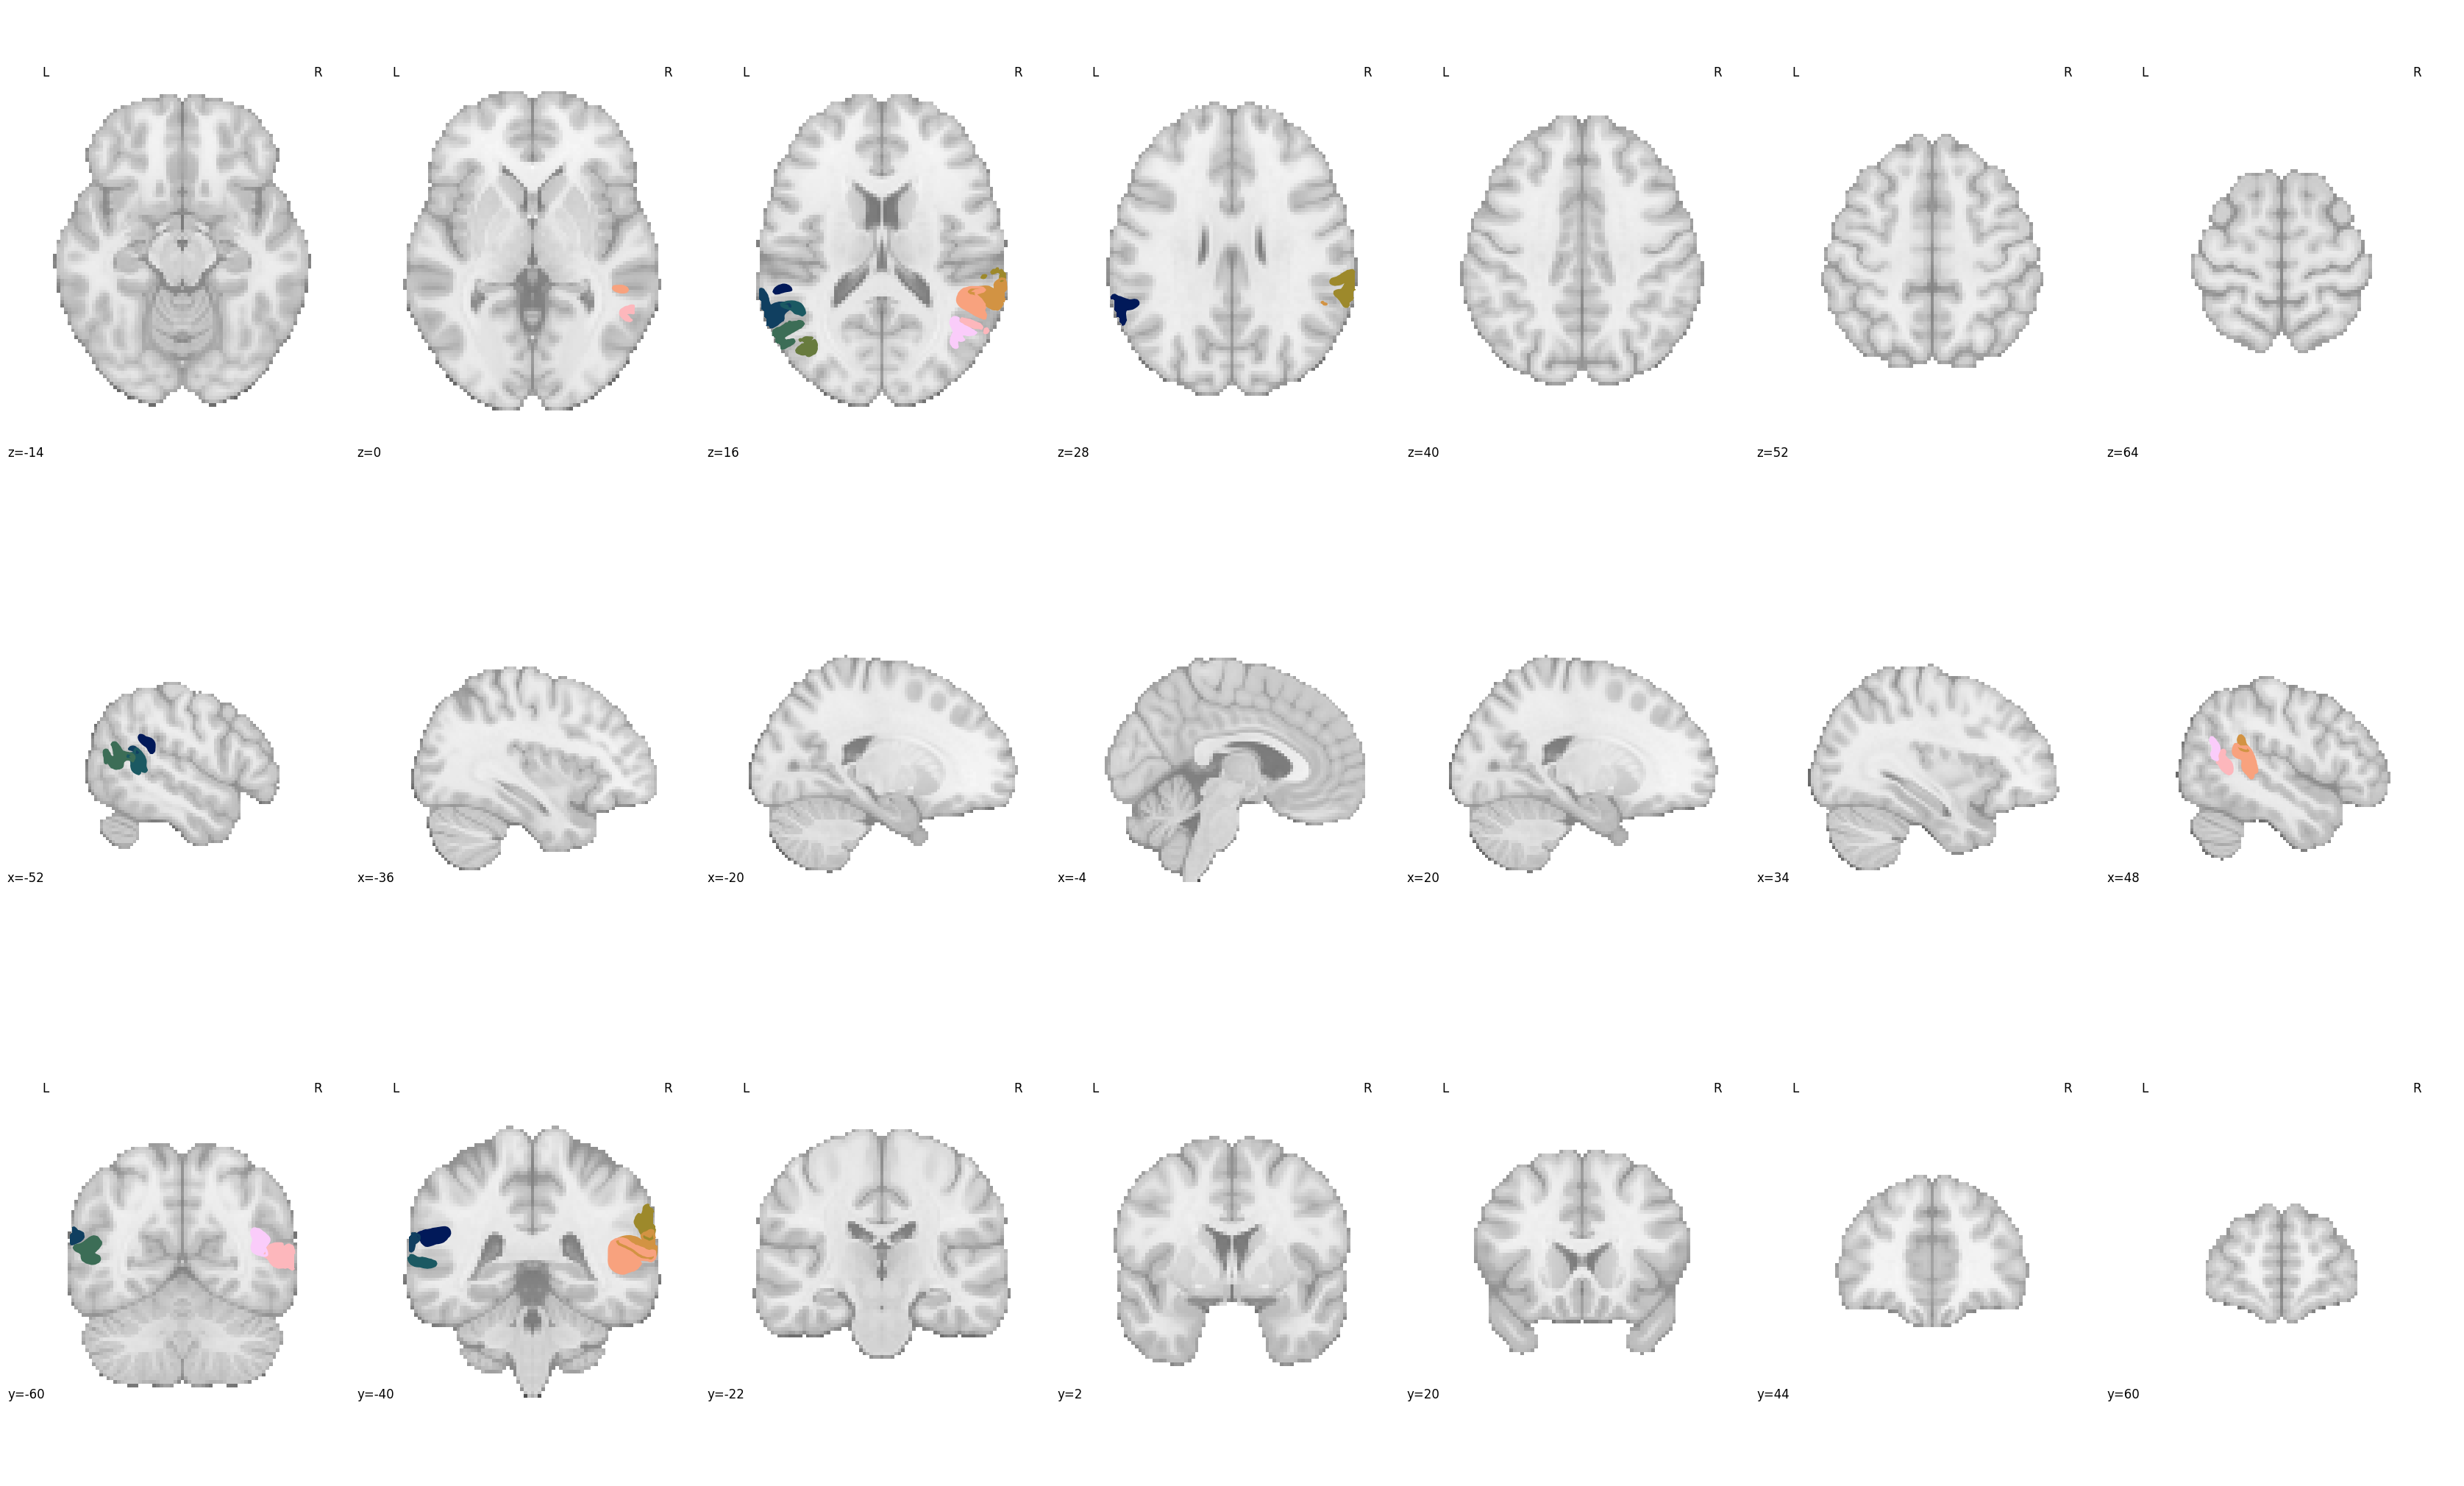

In [25]:
tpj_indices = find_indices_with_term(labels_df, 'TPOJ', columns_to_check)
tpj_atlas = image.index_img(atlas_img, tpj_indices)
plotting.plot_prob_atlas(tpj_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


In [33]:
# labels_df['labels_4'].unique().tolist()

unique_values_ignoring_lr = labels_df['labels_4'].str.replace('_L', '').str.replace('_R', '').unique().tolist()

len(unique_values_ignoring_lr)

unique_values_ignoring_lr

['visual_early',
 'visual_MT+',
 'visual_dorsal',
 'visual_ventral',
 'somatomotor_primary',
 'somatomotor_premotor',
 'cingulate_posterior',
 'auditory_early',
 'parietal_TPOJ',
 'cingulate_dlPFC',
 'parietal_superior_lobule',
 'somatomotor_paracentral_lobule',
 'cingulate_ACC_mPFC',
 'cingulate_ventral_frontal',
 'cingulate_vlPFC',
 'somatomotor_operculum',
 'insula_posterior',
 'auditory_association_cortex',
 'insula_operculum',
 'insula_anterior',
 'parietal_inferior_lobule',
 'temporal_medial',
 'temporal_lateral',
 'Hippocampal_Formation',
 'Amygdala',
 'cerebellar_cortex',
 'vermis',
 'VStriatum',
 'CAU',
 'PUT',
 'GP',
 'Thalamus',
 'Midbrain',
 'Pons',
 'Medulla']

In [ ]:
tpj_indices = find_indices_with_term(labels_df, 'TPOJ', columns_to_check)
tpj_atlas = image.index_img(atlas_img, tpj_indices)
plotting.plot_prob_atlas(tpj_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


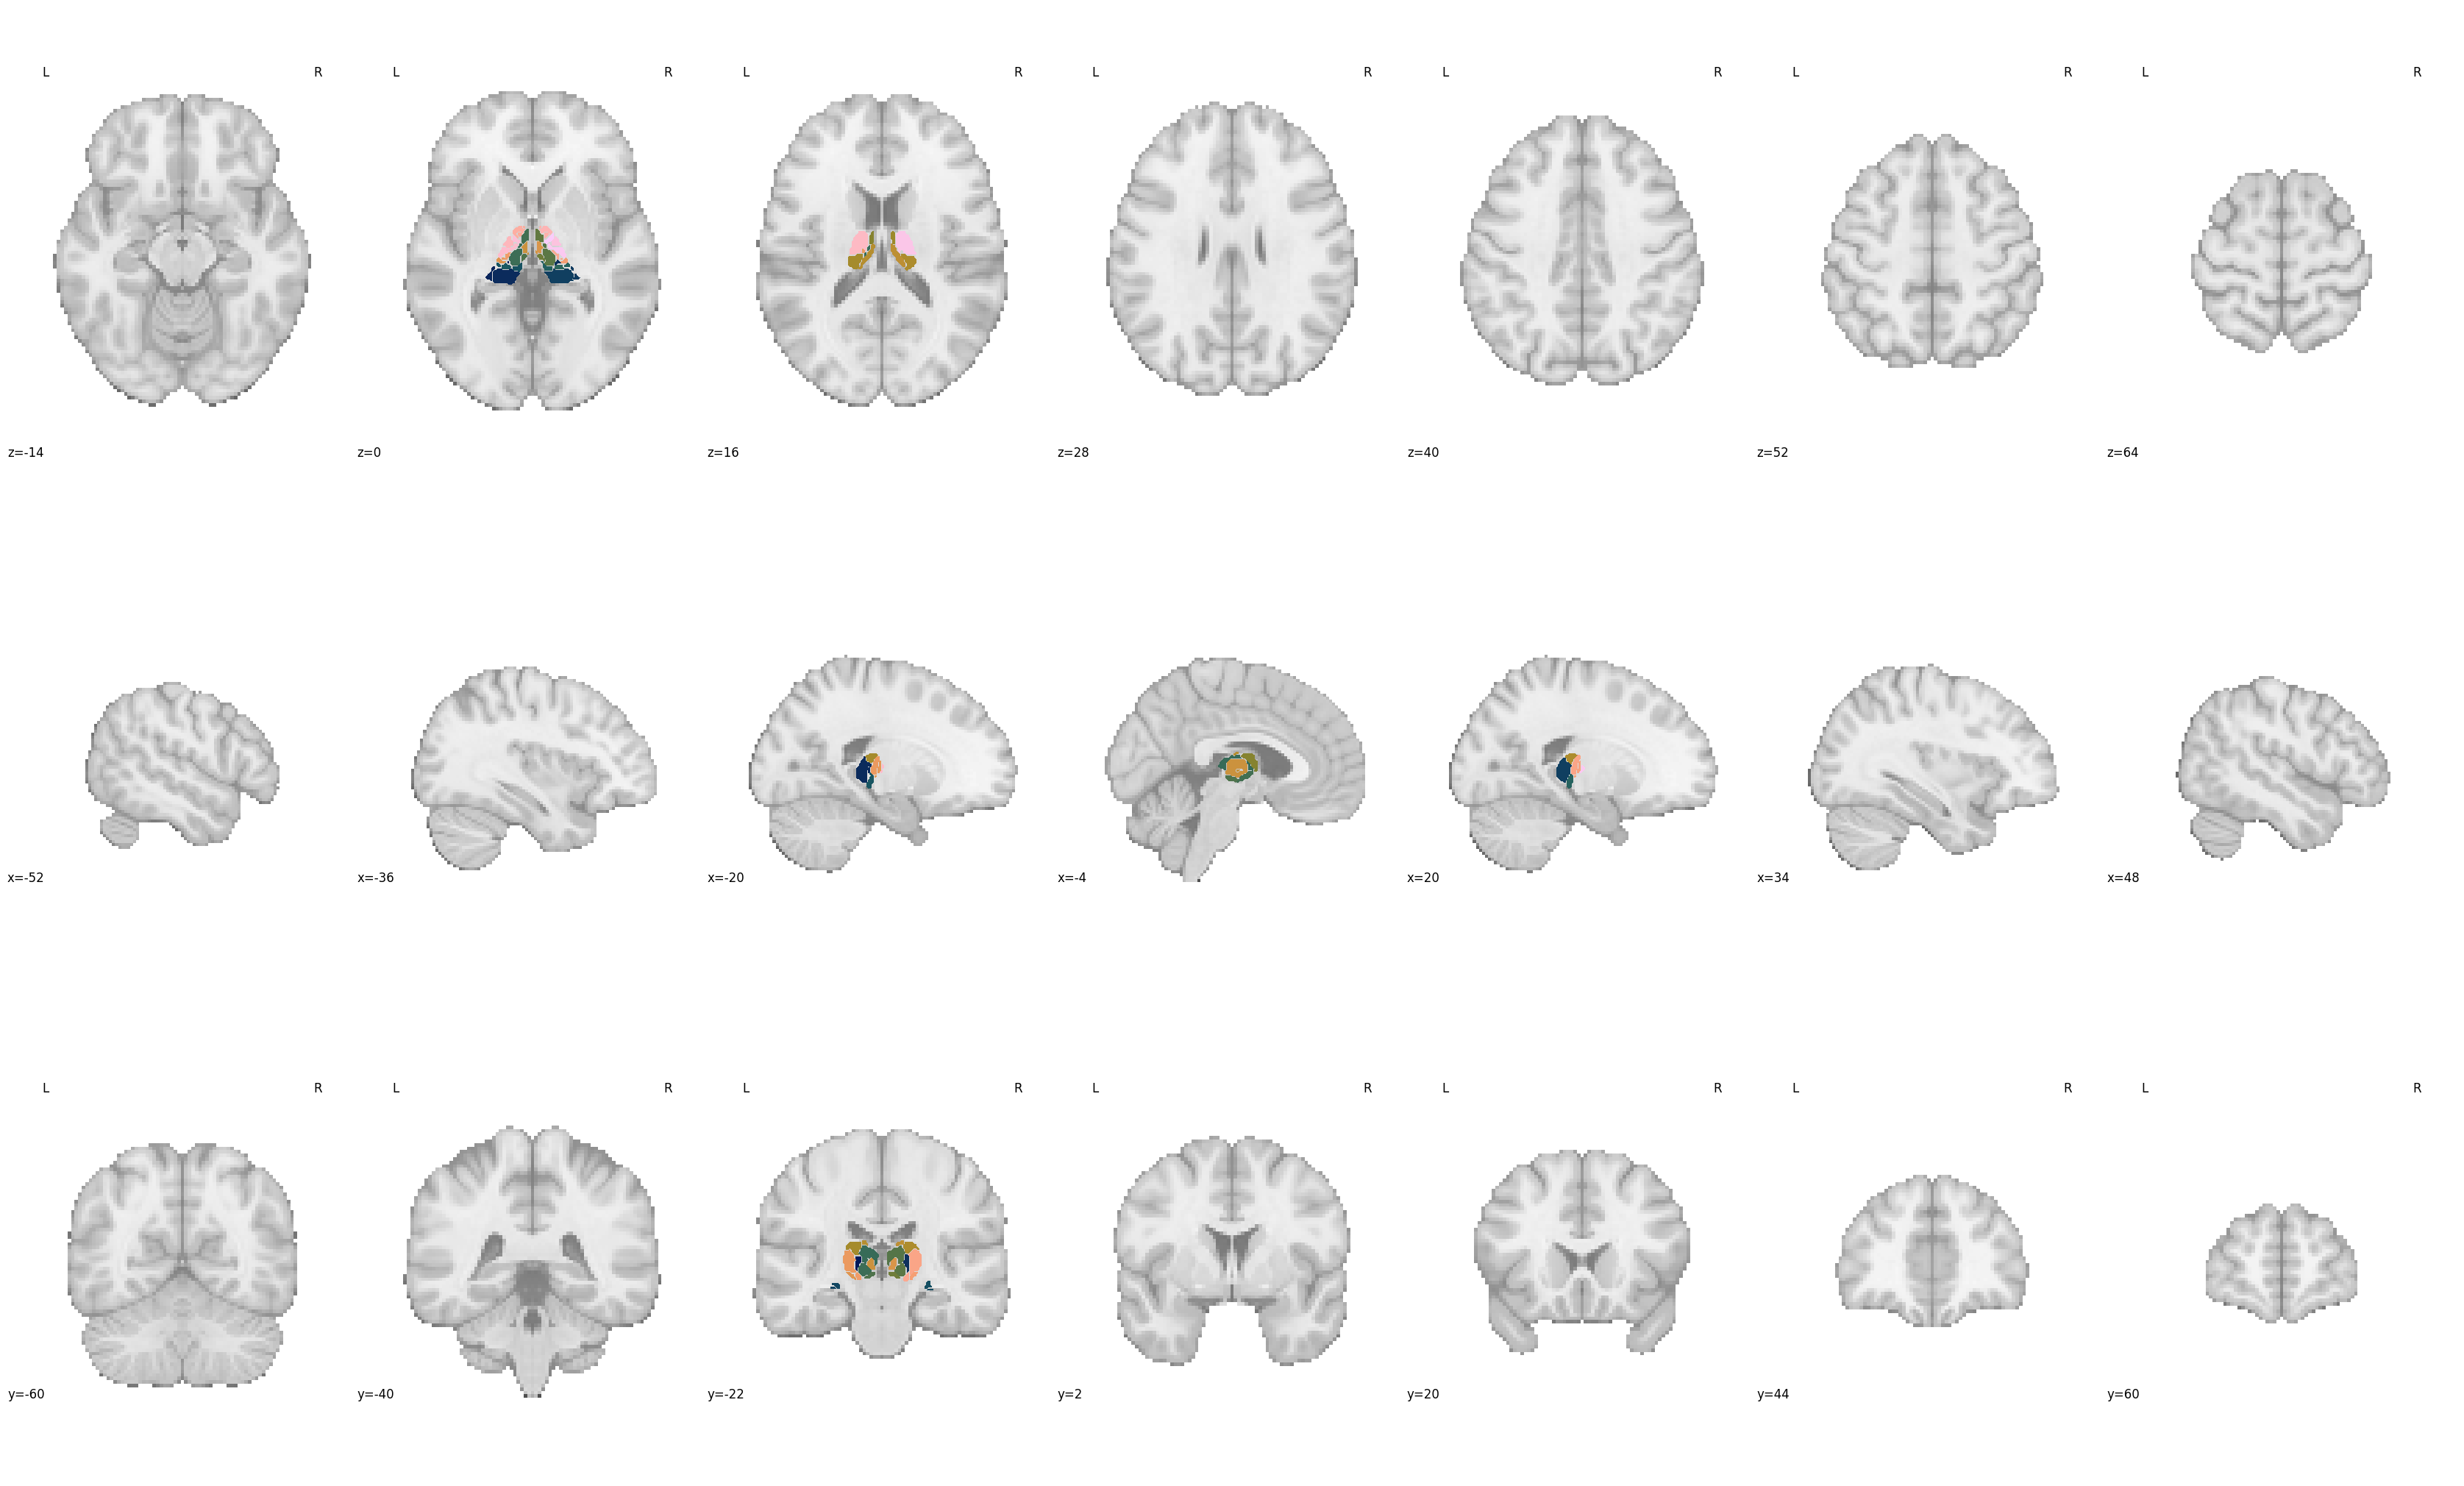

In [34]:
roi_key = 'Thalamus'
thal_indices = find_indices_with_term(labels_df, roi_key, columns_to_check)
print(f"{roi_key} has {len(thal_indices)} number of rois")
thal_atlas = image.index_img(atlas_img, thal_indices)
plotting.plot_prob_atlas(thal_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


Amygdala has 20 number of rois


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


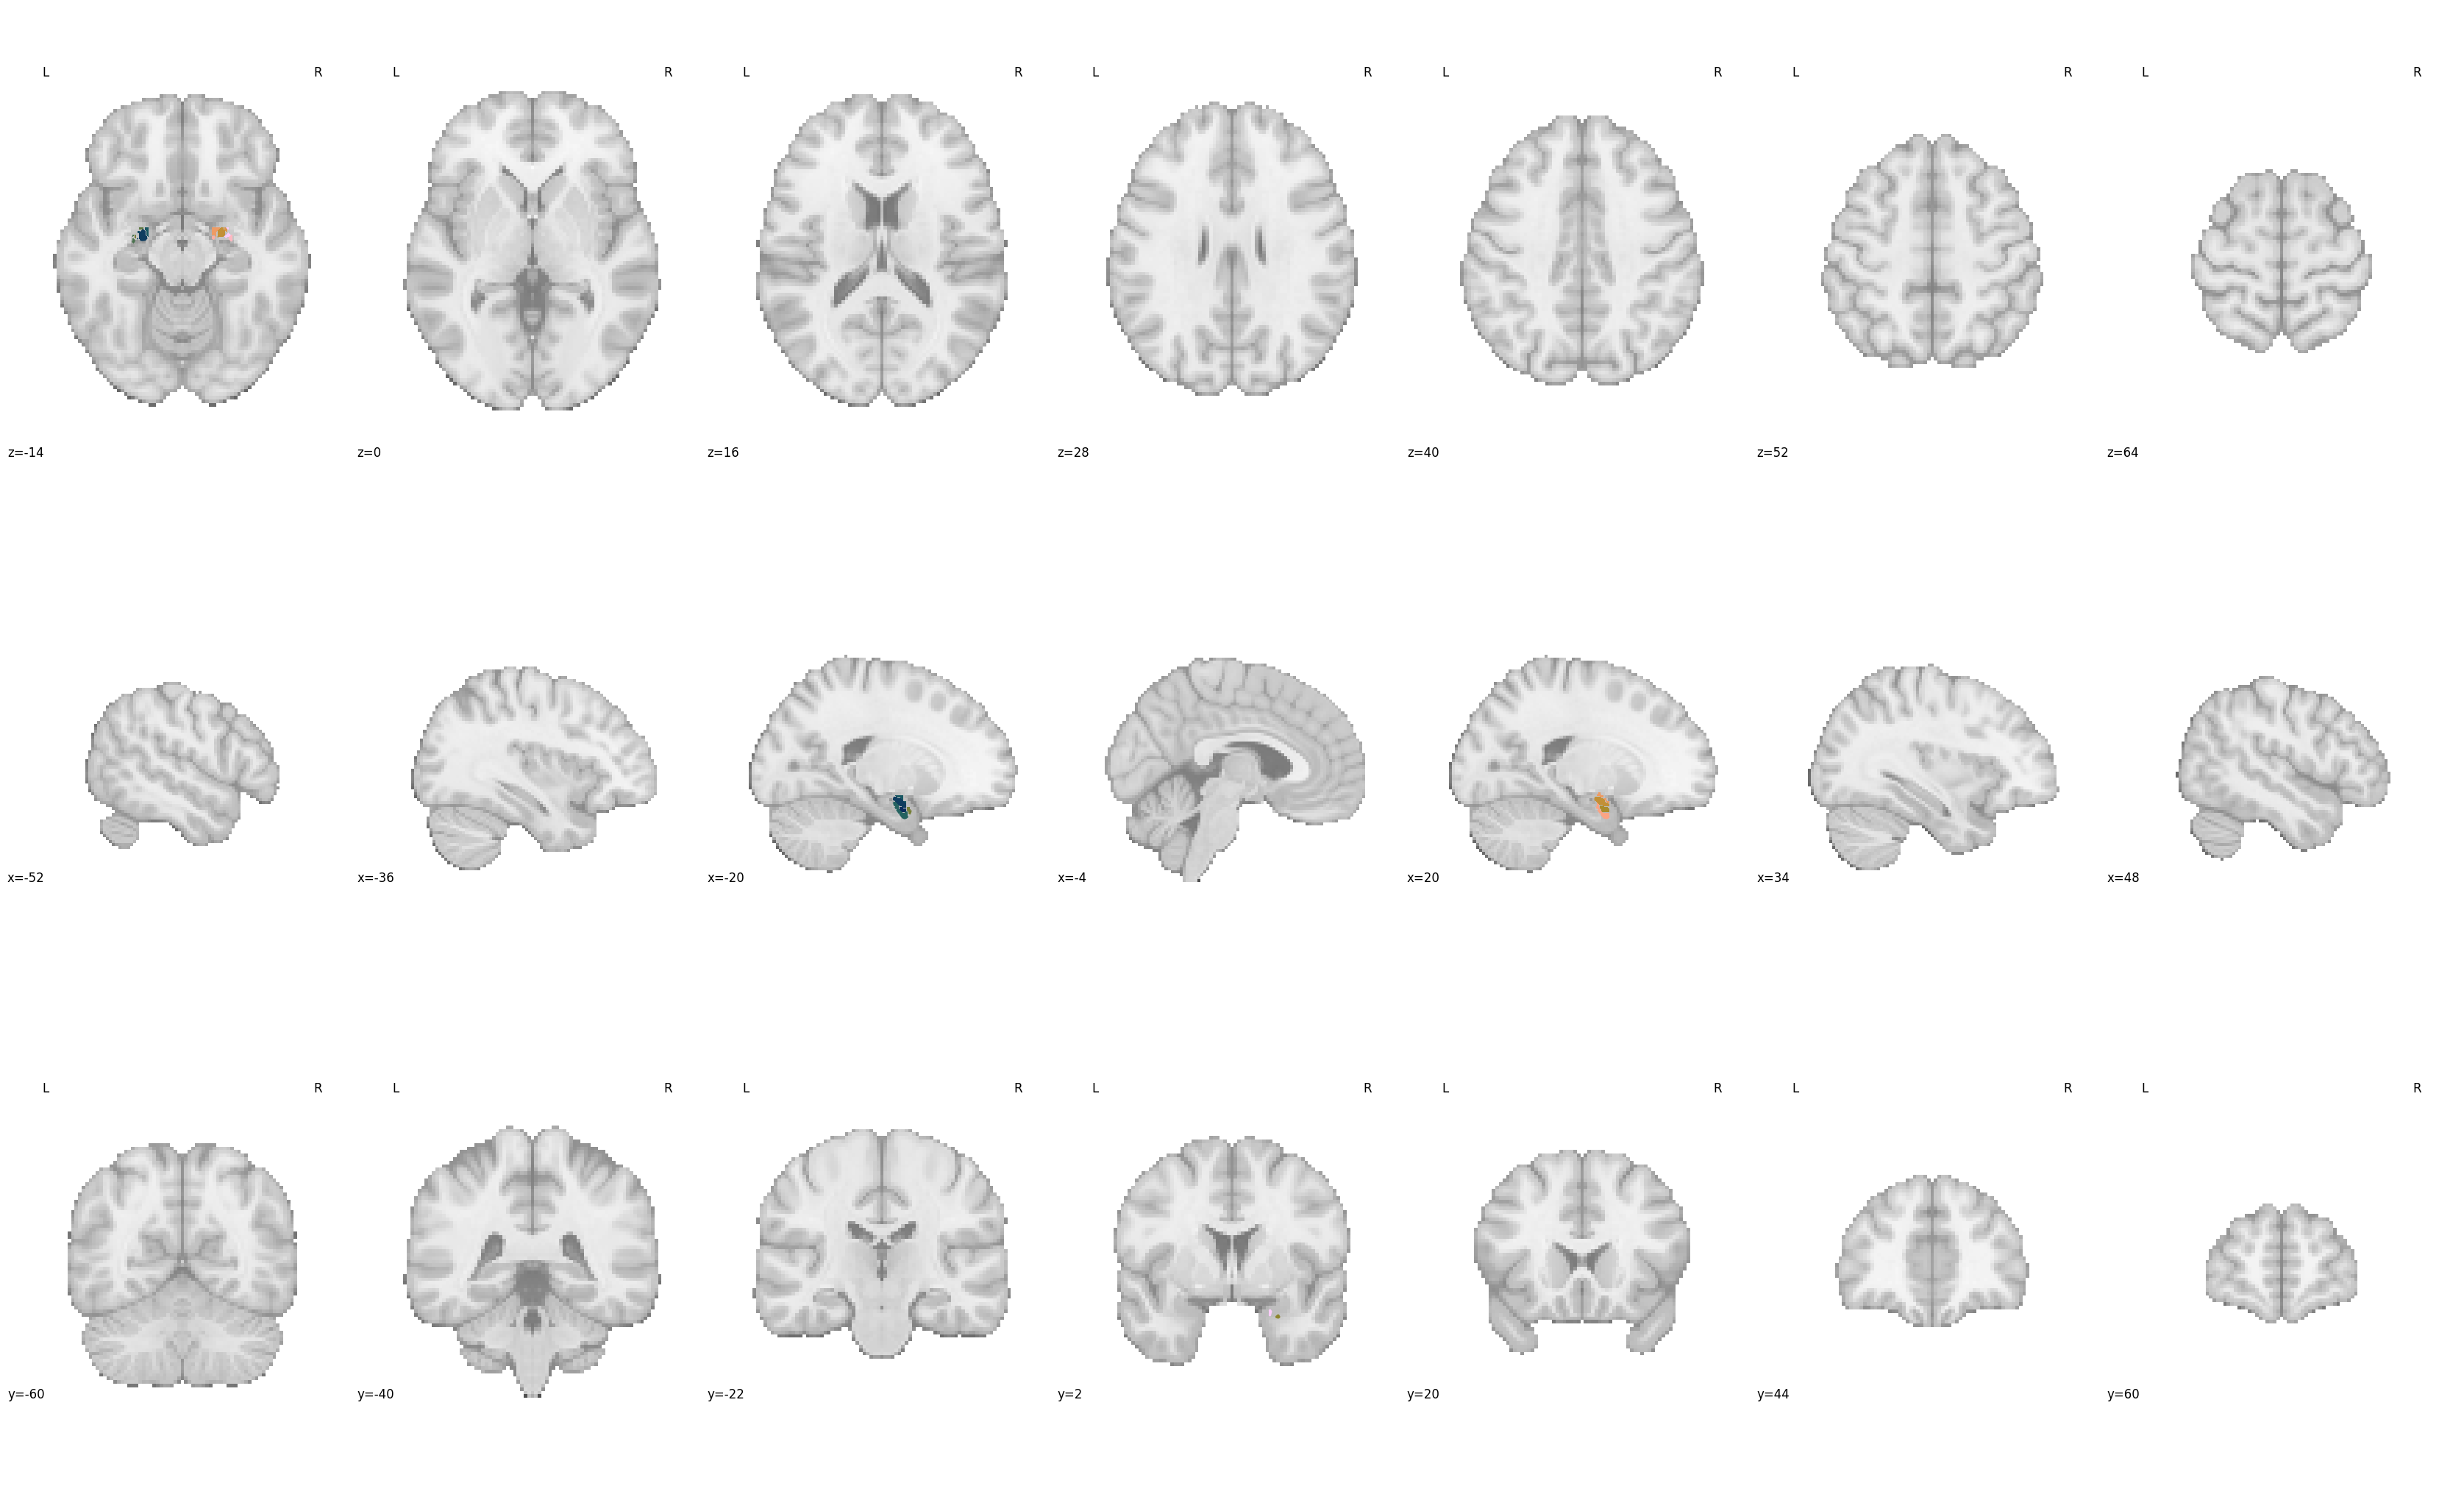

In [35]:
roi_key = 'Amygdala'
thal_indices = find_indices_with_term(labels_df, roi_key, columns_to_check)
print(f"{roi_key} has {len(thal_indices)} number of rois")
thal_atlas = image.index_img(atlas_img, thal_indices)
plotting.plot_prob_atlas(thal_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


# load matlab saved version

In [1]:
fname = '/Users/h/Desktop/CANLab2023_MNI152NLin2009cAsym_fine_2mm.nii'

In [8]:
atlas_img = load_img(fname)
# Load the standard MNI template at 2mm resolution provided by nilearn
target_img = datasets.load_mni152_template(resolution=2)

labels_csv = '/Users/h/Desktop/CANLab2023_MNI152NLin2009cAsym_fine_2mm.csv'
labels_df = pd.read_csv(labels_csv)

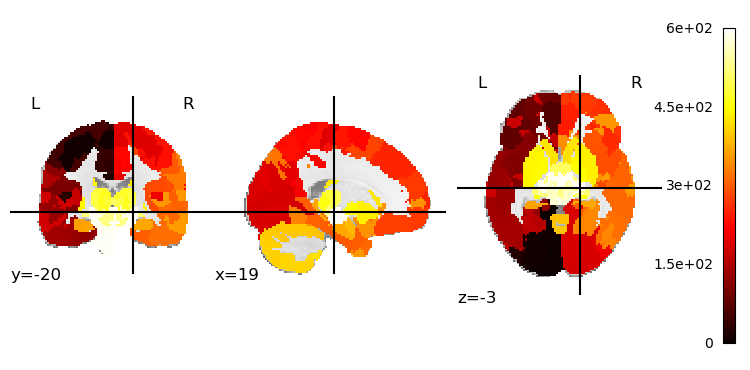

In [9]:
plotting.plot_stat_map(atlas_img)

In [75]:
from neuromaps import parcellate

parc = parcellate.Parcellater(parcellation=fname, 
                       space='MNI152', 
                       resampling_target='parcellation')

In [76]:
singletrial_parc = parc.fit_transform('/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupplateau/sub-0018/sub-0018_ses-03_run-01_runtype-cognitive_event-cue_trial-000_cuetype-low.nii.gz', 'MNI152')

check parcellated image: (1, 595)


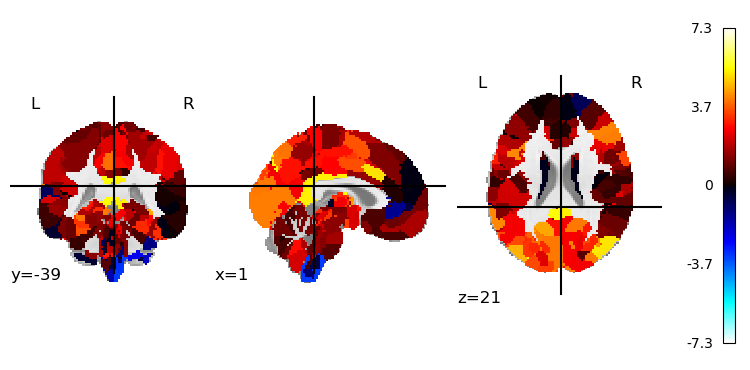

In [77]:
print(f"check parcellated image: {singletrial_parc.shape}")
beta_inv = parc.inverse_transform(singletrial_parc)
plotting.plot_stat_map(beta_inv)

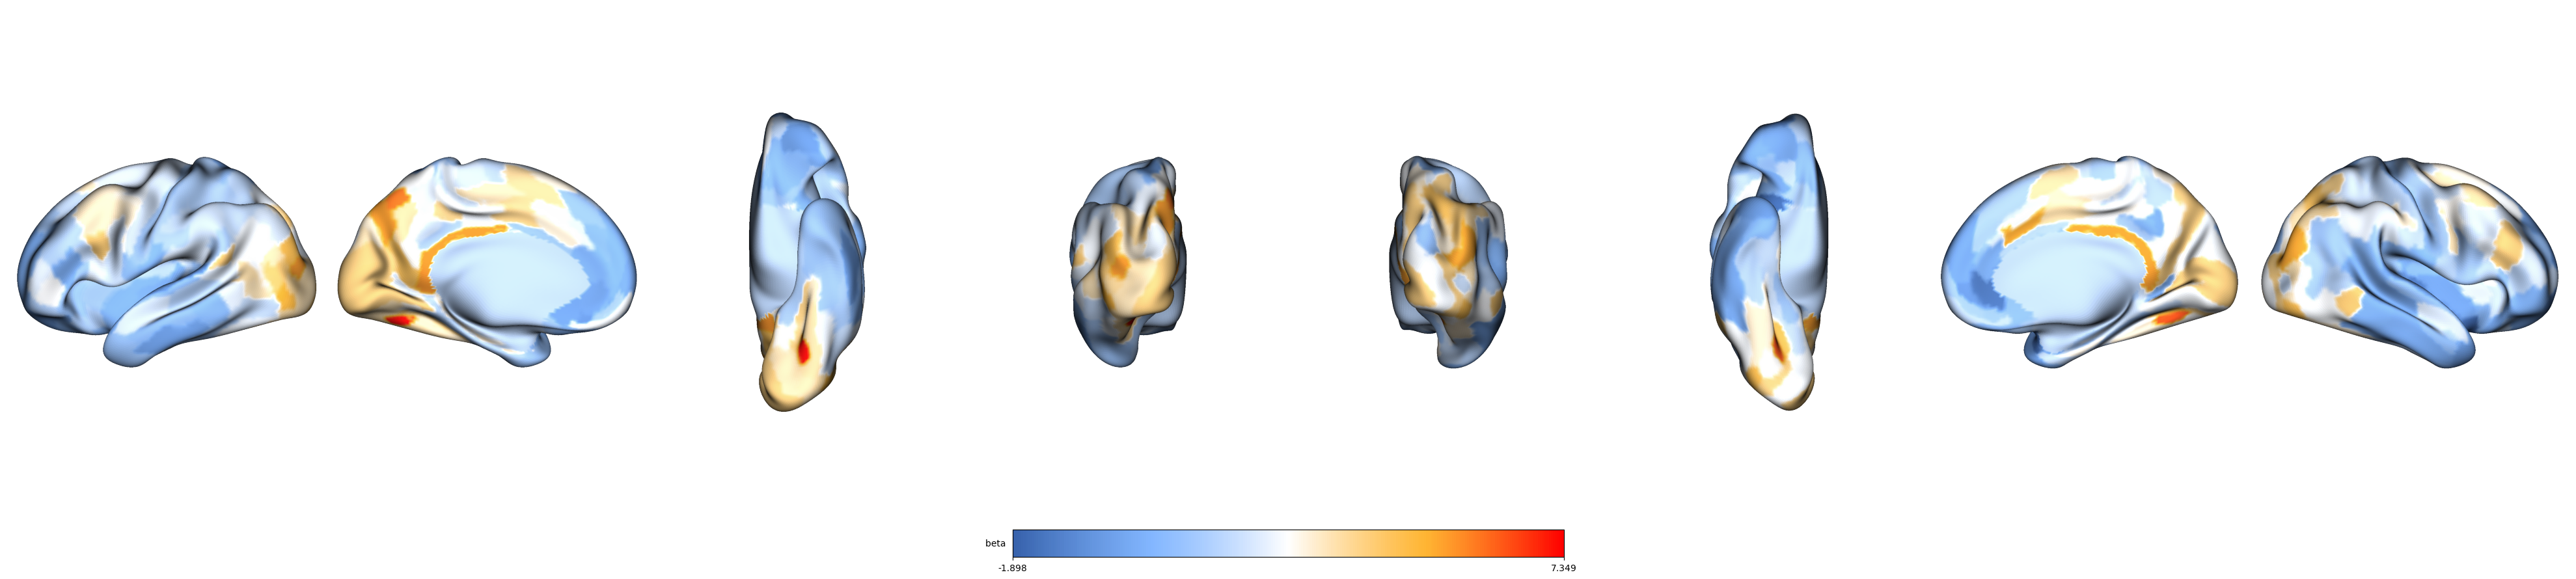

In [88]:
# convert to fslr
# beta_fslr = 
beta_fslr = mni152_to_fslr(
        beta_inv, fslr_density='32k', method='linear')

# singletrial_parcfsLR = parcfsLR.fit_transform(beta_fslr, 'fsLR')
# print(f"check parcellated image: {singletrial_parcfsLR.shape}")
# betafsLR_inv = parcfsLR.inverse_transform(singletrial_parcfsLR)
fig = plot_brain_surfaces(image=beta_fslr, cbar_label=f'beta ', cmap=cmap)#color_range[beta_ind])
plt.show()

In [84]:
beta_inv.shape

(97, 115, 97, 1)

ExpiredDeprecationError: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Raises <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0

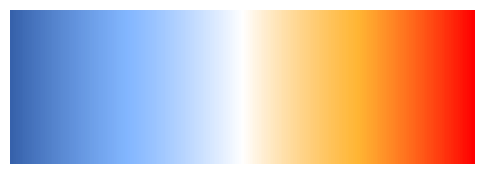

In [43]:
from nilearn import image, plotting
from surfplot import Plot
from neuromaps.transforms import fsaverage_to_fslr
from neuromaps.datasets import fetch_fslr
import glob

def plot_brain_surfaces(image, cbar_label='INSERT LABEL', cmap='viridis', color_range=None):
    """
    Plot brain surfaces with the given data.

    Parameters:
    - TST: Tuple of (left hemisphere data, right hemisphere data) to be plotted.
    - cbar_label: Label for the color bar.
    - cmap: Colormap for the data.
    - color_range: Optional. Tuple of (min, max) values for the color range. If not provided, the range is auto-detected.
    """
    surfaces_fslr = fetch_fslr()
    lh_fslr, rh_fslr = surfaces_fslr['inflated']
    
    p = Plot(surf_lh=lh_fslr,
             surf_rh=rh_fslr, 
             size=(5000, 1000), 
             zoom=1.2, layout='row', 
             views=['lateral', 'medial', 'ventral', 'posterior'], 
             mirror_views=True, brightness=.7)
    p.add_layer({'left': image[0], 
            'right': image[1]}, 
            cmap=cmap, cbar=True,
            color_range=color_range,
            cbar_label=cbar_label
            ) # YlOrRd_r

    cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=3)
    fig = p.build(cbar_kws=cbar_kws)
    return(fig)
    # fig.show()

# Example usage:
# TST = (left_hemisphere_data, right_hemisphere_data)
# plot_brain_surfaces(TST, cbar_label='gradient', cmap='viridis', color_range=(0, .15))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgba
# Define the colors at specific points
colors = [
    (-1.8, "#120041"),  # Start with blue at -1.9
    (-1.2, "#2500fa"),
    (-0.6, "#84c6fd"),  # Start with blue at -1.9
    (0, "white"),    # Transition to white at 0
    (0.4, "#d50044"),
    (0.8, "#ff0000"),    # Start transitioning to red just after 0 towards 1.2
    (1.2, "#ffd400")  # End with yellow at 1.2
]

colors_with_opacity = [
    (-1.8, to_rgba("#3661ab", alpha=1.0)),  # Fully opaque
    (-0.9, to_rgba("#63a4ff", alpha=0.8)),  # Fully opaque
    # (-0.1, to_rgba("#008bff", alpha=0.6)),  # Fully opaque
    (0, to_rgba("white", alpha=1.0)),       # Fully opaque
    # (0.1, to_rgba("#d50044", alpha=0.6)),   # 30% opacity
    (0.6, to_rgba("#ffa300", alpha=0.8)),   # 60% opacity
    (1.2, to_rgba("#ff0000", alpha=1.0))    # Fully opaque
]



# Normalize the points to the [0, 1] interval
norm_points = np.linspace(-1.9, 1.2, len(colors_with_opacity))
norm_colors = [c[1] for c in colors_with_opacity]
norm_points = (norm_points - norm_points.min()) / (norm_points.max() - norm_points.min())

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("custom_gradient", list(zip(norm_points, norm_colors)))

# Create a gradient image
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plot the gradient
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(gradient, aspect='auto', cmap=cmap)
ax.set_axis_off()

plt.show()



In [39]:
singletrialfsLR

(<nibabel.gifti.gifti.GiftiImage at 0x294d5fe10>,
 <nibabel.gifti.gifti.GiftiImage at 0x294d5fdd0>)

check parcellated image: (26666,)


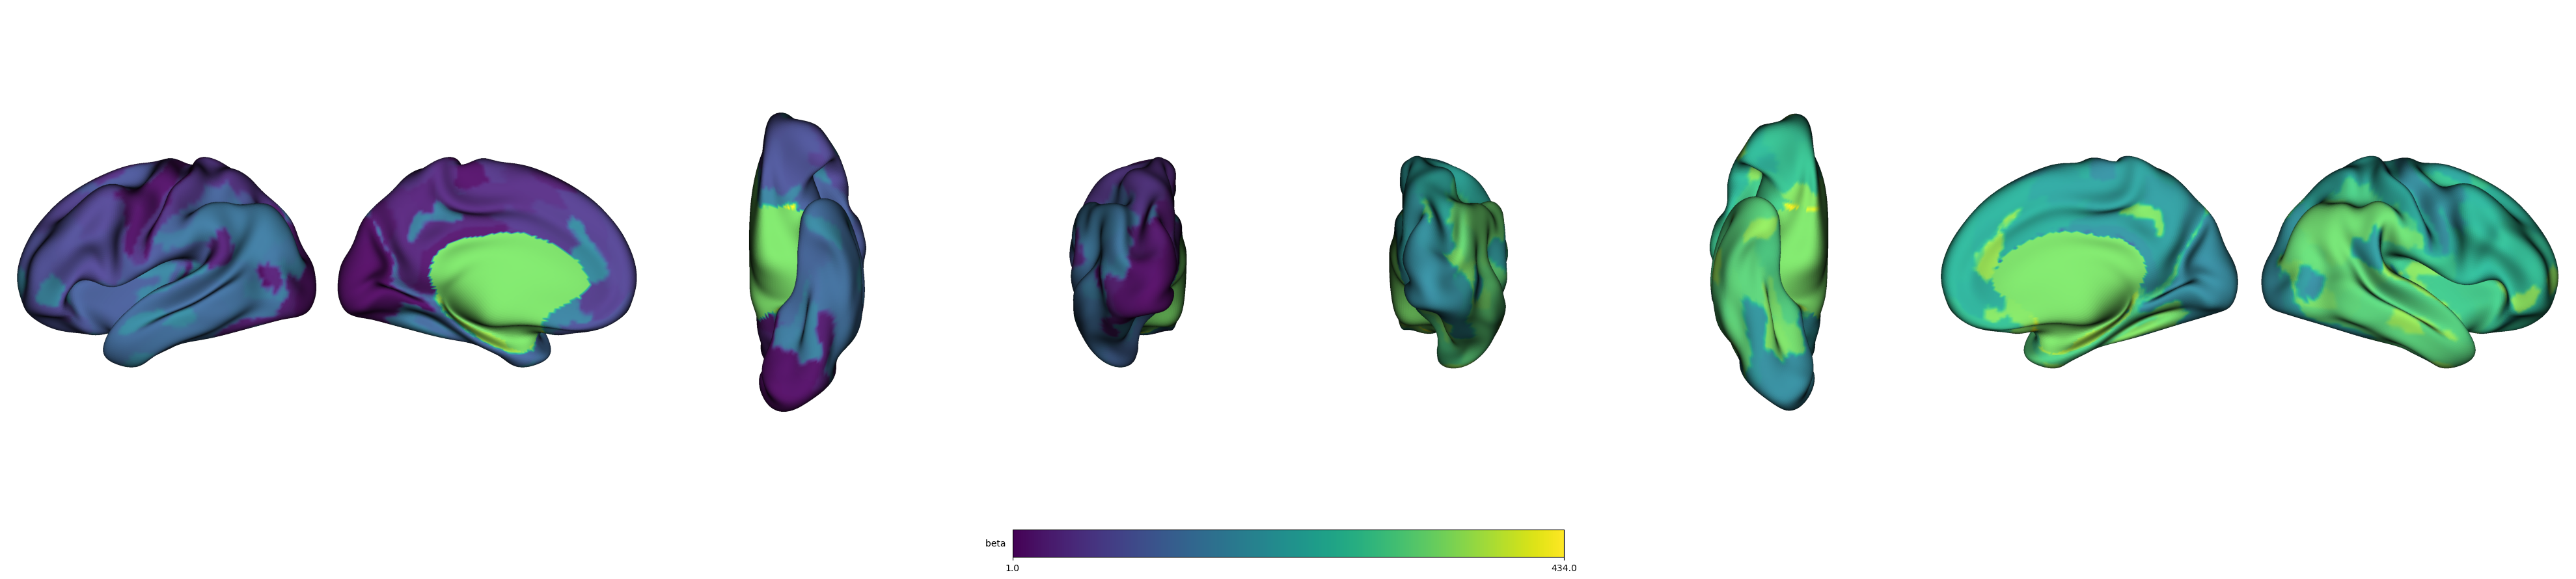

In [74]:
from neuromaps import parcellate
from neuromaps.transforms import mni152_to_fslr
from neuromaps.datasets import fetch_annotation, fetch_fslr
canlab2023fsLR = mni152_to_fslr(
        fname, fslr_density='32k', method='linear')
singletrialfsLR = mni152_to_fslr(
        '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupplateau/sub-0018/sub-0018_ses-03_run-01_runtype-cognitive_event-cue_trial-000_cuetype-low.nii.gz', fslr_density='32k', method='linear')
parcfsLR = parcellate.Parcellater(parcellation=canlab2023fsLR, 
                       space='fsLR', 
                       resampling_target='parcellation')

singletrial_parcfsLR = parcfsLR.fit_transform(singletrialfsLR, 'fsLR')
print(f"check parcellated image: {singletrial_parcfsLR.shape}")
betafsLR_inv = parcfsLR.inverse_transform(singletrial_parcfsLR)

fig = plot_brain_surfaces(image=canlab2023fsLR, cbar_label=f'beta ', cmap='viridis')#color_range[beta_ind])
plt.show()

In [53]:
len(np.unique(canlab2023fsLR[0].agg_data()))

191

In [55]:
singletrialfsLR[0].agg_data()

array([ 1.1518242 ,  1.2154433 ,  2.3076987 , ..., -0.6537053 ,
       -0.34157434, -0.07537952], dtype=float32)

In [73]:
from neuromaps import parcellate
from neuromaps.transforms import mni152_to_fslr
from neuromaps.datasets import fetch_annotation, fetch_fslr
canlab2023fsLR = mni152_to_fslr(
        fname, fslr_density='32k', method='nearest')
singletrialfsLR = mni152_to_fslr(
        '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupplateau/sub-0018/sub-0018_ses-03_run-01_runtype-cognitive_event-cue_trial-000_cuetype-low.nii.gz', fslr_density='32k', method='nearest')


In [ ]:
parcfsLR = parcellate.Parcellater(parcellation=canlab2023fsLR, 
                       space='fsLR', 
                       resampling_target='parcellation')

singletrial_parcfsLR = parcfsLR.fit_transform(singletrialfsLR, 'fsLR')
print(f"check parcellated image: {singletrial_parcfsLR.shape}")
betafsLR_inv = parcfsLR.inverse_transform(singletrial_parcfsLR)

fig = plot_brain_surfaces(image=canlab2023fsLR, cbar_label=f'beta ', cmap='viridis')#color_range[beta_ind])
plt.show()

In [71]:
singletrialfsLR[0].agg_data().shape


(32492,)